In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv', sep = ';')

In [3]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


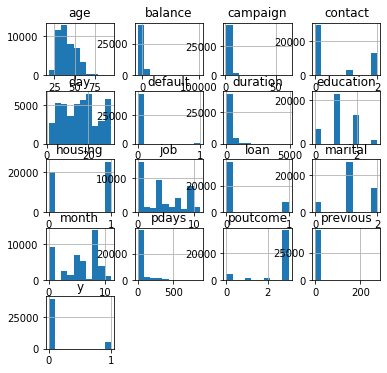

In [25]:
bank_data.hist(figsize=(6,6))
plt.show()



In [4]:
cat_col = bank_data.select_dtypes(include= ['object'])


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
oe = OrdinalEncoder()

In [7]:
oe.fit_transform(cat_col)

array([[4., 1., 2., ..., 8., 3., 0.],
       [9., 2., 1., ..., 8., 3., 0.],
       [2., 1., 1., ..., 8., 3., 0.],
       ...,
       [5., 1., 1., ..., 9., 2., 1.],
       [1., 1., 1., ..., 9., 3., 0.],
       [2., 1., 1., ..., 9., 1., 0.]])

In [8]:
cat_coln = pd.DataFrame(oe.fit_transform(cat_col), columns =  cat_col.columns)

In [9]:
bank_data[cat_coln.columns] = cat_coln

In [10]:
bank_data.drop(columns = ['job','day','month', 'poutcome'])

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y
0,58,1.0,2.0,0.0,2143,1.0,0.0,2.0,261,1,-1,0,0.0
1,44,2.0,1.0,0.0,29,1.0,0.0,2.0,151,1,-1,0,0.0
2,33,1.0,1.0,0.0,2,1.0,1.0,2.0,76,1,-1,0,0.0
3,47,1.0,3.0,0.0,1506,1.0,0.0,2.0,92,1,-1,0,0.0
4,33,2.0,3.0,0.0,1,0.0,0.0,2.0,198,1,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1.0,2.0,0.0,825,0.0,0.0,0.0,977,3,-1,0,1.0
45207,71,0.0,0.0,0.0,1729,0.0,0.0,0.0,456,2,-1,0,1.0
45208,72,1.0,1.0,0.0,5715,0.0,0.0,0.0,1127,5,184,3,1.0
45209,57,1.0,1.0,0.0,668,0.0,0.0,1.0,508,4,-1,0,0.0


In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [12]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()

In [13]:
se = SequentialFeatureSelector(k_features=5, estimator=DecisionTreeClassifier())

In [14]:
mm = se.fit_transform(bank_data.drop(columns= ['y']), bank_data.y)

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
trainX, testX, trainY, testY = train_test_split(mm, bank_data.y)

In [17]:
de.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
de.score(testX, testY)

0.8900291957887286